# Seattle Airbnb Exploration

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#gather">Gather</a></li>
    <li><a href="#assess">Assess</a></li>
    <li><a href="#business">Business Understanding</a></li>
    <li><a href="#data">Data Understanding</a></li>
    <li><a href="#prep">Data Preparation</a></li>
</ul>

<a id='intro'></a>
## Introduction
The data explored in this notebook was obtained from the [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle/data) Kaggle site. The data contains information about the availability of the listings, the characteristics of the listing and host, and reviews provided by guests staying at the listing for 2016. 

It will be explored implementing the Cross-Industry Standard Process for Data Mining (CRISP-DM) process as part of the Write a Data Science Blog Post project requirements for Udacity's Data Scientist Nanodegree. The CRISP-DM process encompasses six elements:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

The data will be gathered and initial exploration completed to enable the first two elements to be completed. Deployment will take the form of a blog post targeted at a general audience, informing them of the action items.

<a id='gather'></a>
## Gather

In [1]:
from zipfile import ZipFile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# Download data - requires saved Kaggle API key to run: https://github.com/Kaggle/kaggle-api
!kaggle datasets download -d airbnb/seattle


  0%|          | 0.00/19.5M [00:00<?, ?B/s]
  5%|5         | 1.00M/19.5M [00:01<00:21, 918kB/s]
 10%|#         | 2.00M/19.5M [00:02<00:19, 921kB/s]
 15%|#5        | 3.00M/19.5M [00:03<00:18, 927kB/s]
 21%|##        | 4.00M/19.5M [00:04<00:17, 931kB/s]
 26%|##5       | 5.00M/19.5M [00:05<00:16, 934kB/s]
 31%|###       | 6.00M/19.5M [00:06<00:15, 936kB/s]
 36%|###5      | 7.00M/19.5M [00:07<00:13, 938kB/s]
 41%|####1     | 8.00M/19.5M [00:08<00:12, 939kB/s]
 46%|####6     | 9.00M/19.5M [00:10<00:12, 910kB/s]
 51%|#####1    | 10.0M/19.5M [00:11<00:10, 919kB/s]
 57%|#####6    | 11.0M/19.5M [00:12<00:09, 925kB/s]
 62%|######1   | 12.0M/19.5M [00:13<00:08, 930kB/s]
 67%|######6   | 13.0M/19.5M [00:14<00:07, 933kB/s]
 72%|#######1  | 14.0M/19.5M [00:15<00:06, 933kB/s]
 77%|#######7  | 15.0M/19.5M [00:16<00:05, 935kB/s]
 82%|########2 | 16.0M/19.5M [00:18<00:03, 937kB/s]
 87%|########7 | 17.0M/19.5M [00:19<00:02, 939kB/s]
 92%|#########2| 18.0M/19.5M [00:20<00:01, 910kB/s]
 98%|#########7| 19

In [24]:
# Unzip files
with ZipFile('seattle.zip', 'r') as zip_file:
    zip_file.extractall()

<a id='assess'></a>
## Assess

In [3]:
# Read in files
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

### Calendar

In [26]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


The dataset contains info on the availability lists per id by date, including if the id was available and the listing price. 

In [27]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


The dataset contains 4 columns and almost 1.4M rows of data.

#### Data Issues Identified
- **listing_id**: <span style="color:green">convert to `str`</span>
- **date**: <span style="color:green"> convert to `datetime`</span>
- **available**: <span style="color:green">convert to dummy</span>
- **price**: <span style="color:green">drop $ and convert to float/int</span>

The only feature with missing values is price but it is possible that this is only the case when the listing is unavailable. 

In [28]:
# Check if number of missing values is the same as number of 'f' availability
assert calendar.price.isna().sum() == calendar.query('available == "f"').shape[0]

It's helpful to check the range of the data for any errors, but due to the current datatypes, some will have to occur after cleaning. We can check values for `available` and `price`.

In [29]:
calendar.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [30]:
calendar.price.value_counts()

$150.00    36646
$100.00    31755
$75.00     29820
$125.00    27538
$65.00     26415
$90.00     24942
$95.00     24327
$99.00     23629
$85.00     23455
$80.00     19817
$110.00    19454
$120.00    19145
$70.00     18439
$60.00     18004
$175.00    17707
$250.00    16870
$55.00     16864
$200.00    16144
$50.00     15978
$115.00    14775
$40.00     13357
$69.00     12922
$135.00    11455
$105.00    11062
$130.00    11008
$89.00     10355
$79.00     10133
$225.00     8163
$45.00      8134
$129.00     8111
           ...  
$745.00        1
$743.00        1
$669.00        1
$722.00        1
$652.00        1
$788.00        1
$693.00        1
$527.00        1
$817.00        1
$481.00        1
$625.00        1
$583.00        1
$711.00        1
$663.00        1
$723.00        1
$10.00         1
$567.00        1
$780.00        1
$503.00        1
$501.00        1
$737.00        1
$794.00        1
$517.00        1
$603.00        1
$616.00        1
$566.00        1
$624.00        1
$12.00        

It appears that while a decimal point is included in the prices, no price actually include cents. Based on what can be viewed above, the lowest price is around \$12 while the highest price ranges close to \$800.

It's also worth doing a quick double check of duplicates (though they are not expected).

In [34]:
calendar.duplicated().sum()

0

This is the only duplicate check that is relevant - all individual columns are expected to have duplicates, but as long as each row is unique, the data is as expected. 

### Listings

In [43]:
pd.set_option('display.max_columns', 100)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [32]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [33]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [37]:
# Check if all rows have unique IDs
listings.id.nunique()

3818

Yes, all are unique.

In [36]:
# What is in "experiences_offered"?
listings.experiences_offered.unique()

array(['none'], dtype=object)

Doesn't matter because all values are none - can drop.

In [38]:
# Are there less host ids?
listings.host_id.nunique()

2751

This means that some hosts have multiple listings.

In [40]:
# Check if host id and url have same number unique
assert listings.host_id.nunique() == listings.host_url.nunique()

Can drop `host_url` because won't be using for interpretation.

In [42]:
# Check if host id and name have same number unique
print(listings.host_id.nunique())
print(listings.host_name.nunique())

2751
1466


Of course they aren't - many people share the same name!

In [45]:
# Check host locations
listings.host_location.unique()

array(['Seattle, Washington, United States',
       'Kirkland, Washington, United States',
       'Quilcene, Washington, United States', 'US', nan,
       'Lowell, Massachusetts, United States',
       'Sammamish, Washington, United States',
       'Los Angeles, California, United States',
       'Shoreline, Washington, United States',
       'Portland, Oregon, United States',
       'San Francisco, California, United States',
       'Berkeley, California, United States',
       'Greenwood Village, Colorado, United States',
       'Ciudad Obregón, Sonora, Mexico',
       'Mercer Island, Washington, United States',
       'Prescott Valley, Arizona, United States',
       'Long Beach, California, United States',
       'San Diego, California, United States', 'SG',
       'Breckenridge, Colorado, United States',
       'Massachusetts, United States', 'Addison, Texas, United States',
       'Kent, Washington, United States',
       'Newcastle, Washington, United States',
       'Tucson, Ar

In [46]:
# Check response times
print(listings.host_response_time.nunique())
listings.host_response_time.unique()

4


array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

Four levels, easy to dummy.

In [47]:
# Check values for acceptance rate
listings.host_acceptance_rate.value_counts()

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

Value counts are not very interesting, perhaps just create dummy for missing.

In [48]:
# Explore missing values for superhost
listings[listings.host_is_superhost.isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,2016-01-04,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,none,This spot is in Belltown across the street fro...,Please accept my apologies for not being able ...,Seattle has a lot of transportation options in...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/im/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,42515980,https://www.airbnb.com/users/show/42515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Western Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616705,-122.353969,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$99.00,$725.00,NaN,NaN,$25.00,1,$25.00,2,13,2 months ago,t,30,60,89,89,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,2016-01-04,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/im/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,1075031,https://www.airbnb.com/users/show/1075031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"6th Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615974,-122.340537,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$250.00,"$1,200.00","$3,600.00",NaN,NaN,1,$0.00,1,1125,a week ago,t,3,3,3,3,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


I'm going to drop the these two values because I don't understand why this information is missing. 

In [50]:
# Explore host neighbourhood
print(listings.host_neighbourhood.nunique())
listings.host_neighbourhood.unique()

102


array(['Queen Anne', nan, 'Ballard', 'Belltown', 'Phinney Ridge', 'Alki',
       'Fremont', 'Holly', 'Lower Queen Anne', 'Green Lake', 'Eastlake',
       'Ravenna', 'Westlake', 'Columbia City', 'South Park', 'Kaanapali',
       'Wallingford', 'Capitol Hill', 'Long Beach', 'Northwest District',
       'Waianae Coast', 'Minor', 'Magnolia', 'Madrona',
       'Harrison/Denny-Blaine', 'Leschi', 'University District',
       'Roosevelt', 'Mission District', 'Madison Park', 'Stevens',
       'Central San Pedro', 'Atlantic', 'North Beacon Hill',
       'Central Business District', 'Pike Place Market', 'Portage Bay',
       'South Lake Union', 'Fenway/Kenmore', 'East Village',
       'Clairemont Mesa East', 'Forestland', 'Hollywood',
       'Manhattan Beach', 'Downtown Toronto', 'International District',
       'Yesler Terrace', 'First Hill', 'Anaheim', 'Maple Leaf',
       'Seward Park', 'Pioneer Square', 'Gatewood', 'The Junction',
       'North Admiral', 'Arbor Heights', 'North Hollywood', '

These could be helpful, but that's a lot of dummies, will need to check against number of rows and other dummies.

In [52]:
# What is the difference between host_listings_count & host_total_listings_count
(listings.host_listings_count == listings.host_total_listings_count).sum() 

3816

There's no difference except for the two missing values. Can drop one.

In [53]:
# Explore host pictures
listings.host_has_profile_pic.value_counts()

t    3809
f       7
Name: host_has_profile_pic, dtype: int64

Essentially bool

In [55]:
# Check values for city
listings.city.value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
seattle                     1
西雅图                         1
Ballard, Seattle            1
Phinney Ridge Seattle       1
Name: city, dtype: int64

In [56]:
# Check values for state
listings.state.value_counts()

WA    3817
wa       1
Name: state, dtype: int64

These both mean Washington.

In [59]:
# Check single market
assert listings.market.nunique() == 1

In [61]:
# Check values for smart_listing
listings.smart_location.value_counts()

Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
西雅图, WA                         1
seattle, wa                     1
Ballard, Seattle, WA            1
Phinney Ridge Seattle, WA       1
Name: smart_location, dtype: int64

These all mean Seattle. 

In [62]:
# Check details for country
assert listings.country.nunique() == 1
assert listings.country_code.nunique() == 1

In [64]:
# Check property types
listings.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

16 levels, but not hard to dummy. 

In [65]:
# Check room types
listings.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

Three levels, easy to dummy.

In [66]:
# Explore bathroom nulls
listings[listings.bathrooms.isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1242,19611,https://www.airbnb.com/rooms/19611,20160104002432,2016-01-04,1 Bedroom Downtown Seattle Oasis,This central unit is perfect for anyone lookin...,Seattle Oasis Vacations proudly offer this wel...,This central unit is perfect for anyone lookin...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/4b39eff5-6...,https://a2.muscache.com/im/pictures/4b39eff5-6...,https://a2.muscache.com/ac/pictures/4b39eff5-6...,https://a2.muscache.com/ac/pictures/4b39eff5-6...,74305,https://www.airbnb.com/users/show/74305,Darik,2010-01-27,"Kent, Washington, United States","My wife, Sally and I are excited for you to st...",within a few hours,94%,100%,f,https://a0.muscache.com/ac/users/74305/profile...,https://a0.muscache.com/ac/users/74305/profile...,Belltown,34.0,34.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"3rd Ave, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615611,-122.345927,t,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",NaN,$107.00,NaN,NaN,NaN,$96.00,1,$0.00,2,365,today,t,22,46,76,151,2016-01-04,26,2010-03-23,2015-11-12,87.0,9.0,9.0,10.0,9.0,9.0,8.0,f,NaN,WASHINGTON,f,strict,t,t,6,0.37
1314,59827,https://www.airbnb.com/rooms/59827,20160104002432,2016-01-04,1 Bedroom Sweeping View Oasis,NaN,"Welcome to Seattle Oasis Vacations, your home ...","Welcome to Seattle Oasis Vacations, your home ...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/1e559a5c-7...,https://a2.muscache.com/im/pictures/1e559a5c-7...,https://a2.muscache.com/ac/pictures/1e559a5c-7...,https://a2.muscache.com/ac/pictures/1e559a5c-7...,74305,https://www.airbnb.com/users/show/74305,Darik,2010-01-27,"Kent, Washington, United States","My wife, Sally and I are excited for you to st...",within a few hours,94%,100%,f,https://a0.muscache.com/ac/users/74305/profile...,https://a0.muscache.com/ac/users/74305/profile...,Belltown,34.0,34.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"3rd Ave, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616274,-122.344126,t,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",NaN,$135.00,NaN,NaN,NaN,$96.00,1,$0.00,2,365,today,t,24,54,84,204,2016-01-04,13,2010-12-24,2015-12-20,87.0,9.0,9.0,9.0,9.0,9.0,8.0,f,NaN,WASHINGTON,t,strict,t,t,6,0.21
1357,19623,https://www.airbnb.com/rooms/19623,20160104002432,2016-01-04,2 Bedroom Downtown Seattle Oasis,NaN,Seattle Oasis Vacations proudly offer this we

There's no real pattern to the nulls, but very few, so may just drop these entries.

In [67]:
# Explore bed_type
listings.bed_type.value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

Five levels, easy to create dummies.

In [69]:
# Explore meaning of guests_included
guests = listings[['accommodates', 'guests_included']].copy()
guests['diff'] = listings.accommodates - listings.guests_included
guests.head()

,accommodates,guests_included,diff
0,4,2,2
1,4,1,3
2,11,10,1
3,3,1,2
4,6,6,0


In [73]:
guests.describe()

,accommodates,guests_included,diff
count,3818.000000,3818.000000,3818.000000
mean,3.349398,1.672603,1.676794
std,1.977599,1.311040,1.693208
min,1.000000,0.000000,-13.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000
75%,4.000000,2.000000,2.000000
max,16.000000,15.000000,13.000000


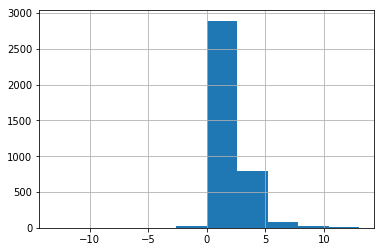

In [72]:
guests['diff'].hist();

There's at least one strange outlier. It seems the majority interpret "guests" to mean "additional person beyond yourself. But some seem to interpret as "total number of people staying." I think this means additional guests will typically incur a cost. I might create a "max occupancy covered by price" but it will require some assumptions.

In [77]:
# Explore min/max nights
listings[['minimum_nights', 'maximum_nights']].describe()

,minimum_nights,maximum_nights
count,3818.000000,3818.000000
mean,2.369303,780.447617
std,16.305902,1683.589007
min,1.000000,1.000000
25%,1.000000,60.000000
50%,2.000000,1125.000000
75%,2.000000,1125.000000
max,1000.000000,100000.000000


The majority have 1 or 2 minimum nights (no listings have 0). At least one listing has a maximum of 1. Most places seem to not really have a max, as they are listing values that are equivalent of 3 years+. 

In [78]:
# Explore calendar updated
listings.calendar_updated.unique()

array(['4 weeks ago', 'today', '5 weeks ago', '6 months ago',
       '7 weeks ago', '2 weeks ago', 'yesterday', '5 months ago',
       'a week ago', '5 days ago', '3 days ago', '2 months ago',
       '3 months ago', '4 days ago', '2 days ago', '3 weeks ago',
       '1 week ago', '13 months ago', '6 weeks ago', '8 months ago',
       '12 months ago', '4 months ago', 'never', '6 days ago',
       '10 months ago', '14 months ago', '9 months ago', '7 months ago',
       '30 months ago', '11 months ago', '22 months ago', '16 months ago',
       '15 months ago', '17 months ago'], dtype=object)

These could be converted to numerical values (equivalent days) if used to not require dummy variables. 

In [81]:
# Check if variation in has_availability
assert listings.has_availability.nunique() == 1

All listings have availability, can drop this column.

In [83]:
# Check if scrape date and calendar scrape date are the same
assert (listings.last_scraped == listings.calendar_last_scraped).sum() == listings.shape[0]

These are the same, can be dropped.

In [86]:
# Check if anyone requires license
listings.requires_license.value_counts()

f    3818
Name: requires_license, dtype: int64

No, can be dropped.

In [87]:
# Check if variation in jurisdiction
assert listings.jurisdiction_names.nunique() == 1

No, can be dropped

In [88]:
# Explore cancellation policies
print(listings.cancellation_policy.nunique())
listings.cancellation_policy.unique()

3


array(['moderate', 'strict', 'flexible'], dtype=object)

Three levels, easy to dummy.

In [90]:
# Check calculated_host_listings_count is the same as host_listings_count
(listings.calculated_host_listings_count == listings.host_listings_count).sum()

3189

For the most part (83.5% of the time), they do match. What is this second colum?

In [91]:
listings[['calculated_host_listings_count', 'host_listings_count']].head(10)

,calculated_host_listings_count,host_listings_count
0,2,3.0
1,6,6.0
2,2,2.0
3,1,1.0
4,1,2.0
5,1,1.0
6,1,1.0
7,5,5.0
8,1,1.0
9,6,6.0


It suggests that one of these is not accurate. Will need to do more work if going to determine which is accurate.

The dataset contains 92 columns and 3,818 rows of data. It looks as if this provides details for unique listings per row.

Details of the columns are as follows (data cleaning are in green, feature engineering in orange):
- **id**: Listing id, all unique, helpful for joining. <span style="color:green">Convert to str.</span>
- **listing_url**: The url for the listing of the form `https://www.airbnb.com/rooms/id`. <span style="color:green">Can be dropped.</span>
- **scrape_id**: The id of the data scrape by airbnb. <span style="color:green">Can be dropped.</span>
- **last_scraped**: The date of the scrape. <span style="color:green">Can be dropped.</span>
- **name**: Name selected by host for listing. <span style="color:orange">Could be useful for common term extraction.</span>
- **summary, space, description**: Text descriptions of the property provided by host. It appears that the information found in each of these can overlap. <span style="color:orange">Could be useful for common term extraction.</span>
- **experiences_offered**: All values are `none`. <span style="color:green">Can be dropped.</span>
- **neighborhood_overview**: Neighborhood description that looks to be provided by the host. Not always provided. 27% missing. <span style="color:orange">Could be useful for common term extraction.</span>
- **notes**: Additional information provided by the host. The information provided in this column can be quite variable. 42% missing. <span style="color:orange">Maybe just create missing dummy.</span>
- **transit**: Description of availability of public transport by host. 24% missing. <span style="color:orange">Text extraction likely quite helpful.</span>
- **thumbnail_url**: Link of the thumbnail image used for the listing. 8% missing. <span style="color:orange">Can create dummy for image present or not.</span>
- **medium_url**: Larger size of above. Same missing %. <span style="color:green">Can be dropped.</span>
- **picture_url**: Always has a picture url. What is the picture if thumbnail is missing? Otherwise, the same. <span style="color:green">Likely can be dropped.</span>
- **xl_picture_url**: Larger size of above. Same missing %. <span style="color:green">Can be dropped.</span>
- **host_id**: ID for the host, there are definitely hosts with multiple listings. <span style="color:green">Convert to str</span>
- **host_url**: url for host, same number as host_id. <span style="color:green">Can be dropped.</span>
- **host_name**: Seems just first name is typically used. Repeats because ppl have the same name. <span style="color:green">Can be dropped.</span>
- **host_since**: Date from when the host joined. <span style="color:green">Convert to unix date</span>
- **host_location**: Info provided by hosts. Typically of city, state, country format, but not consistent. 8 missing. <span style="color:orange">Needs cleaning to be interpretable.</span>
- **host_about**: Description provided by host. My contain location and employment/hobbies info. 22% missing. <span style="color:orange">Could be useful for common term extraction.</span>
- **host_response_time**: Ordinal categorization of response time with four levels. 14% missing. <span style="color:orange">Creat dummies.</span>
- **host_response_rate**: Percentage of whether they respond. 14% missing. <span style="color:green">Drop % and convert to int.</span>
- **host_acceptance_rate**: Almost all 100% (One 0%). 20% missing - does this mean no one has applied? <span style="color:orange">Can dummy for missing.</span>
- **host_is_superhost**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **host_thumbnail_url**: Url of host pic thumbnail. <span style="color:green">Can be dropped.</span>
- **host_picture_url**: Large version of above. <span style="color:green">Can be dropped.</span>
- **host_neighbourhood**: Seems to represent host location but distinct values. Can be in Seattle but can be elsewhere. 102 values. 8% missing. <span style="color:orange">Need to be combined with state/country for accurate location info.</span>
- **host_listings_count**: Seems to be number of listings per host. Only two missing. <span style="color:green">Double check data accuracy.</span>
- **host_total_listings_count**: Seems no different than above. <span style="color:green">Can be dropped.</span>
- **host_verifications**: List of methods(?) that host has been verified. <span style="color:green">Need to extract values if using.</span>
- **host_has_profile_pic**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **host_identity_verified**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **street**: Provides street, city, state abbr, zip code and country info for listing. <span style="color:green">Likely drop. Maybe extract missing zipcodes.</span>
- **neighbourhood**: <span style="color:green">Can be dropped because of below.</span>
- **neighbourhood_cleansed**: Provides neighbourhood details for the listing. <span style="color:orange">Maybe convert to dummy.</span>
- **neighbourhood_group_cleansed**: Provides wider grouping of listing location. <span style="color:orange">Maybe convert to dummy.</span>
- **city**: All values are the equivalent of Seattle <span style="color:green">Can be dropped.</span>
- **state**: All values are the equivalent of Washington <span style="color:green">Can be dropped.</span>
- **zipcode**: Zipcode of listing. <span style="color:green">Attempt to use `street` to extract missing values.</span>
- **market**: <span style="color:green">Can be dropped.</span>
- **smart_location**: All equivalent of Seattle. <span style="color:green">Can be dropped.</span>
- **country_code**: <span style="color:green">Can be dropped.</span>
- **country**: <span style="color:green">Can be dropped.</span>
- **latitude, longitude**: Coordinates for listing
- **is_location_exact**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **property_type**: Selection of property types. <span style="color:orange">Convert to dummies.</span>
- **room_type**: Three levels, entire, private, shared. <span style="color:orange">Convert to dummies.</span>
- **accommodates**: Max number of ppl able to be accommodated.
- **bathrooms**: Number of bathrooms in listing. >1% missing <span style="color:green">May drop missing.</span>
- **bedrooms**: Number of bedrooms in listing. >1% missing <span style="color:green">May drop missing.</span>
- **beds**: Number of beds in listing. 1 missing <span style="color:green">May drop missing.</span>
- **bed_type**: Five levels of bed type. <span style="color:orange">Convert to dummies.</span>
- **amenities**: List of available amenities. <span style="color:green">Need to extract values and manage entries that are null.</span>
- **square_feet**: Size of listing. 97% Missing. <span style="color:orange">Maybe dummy for missing.</span>
- **price**: Price of listing (at time of scrape?) <span style="color:green">Maybe drop because of calendar price.</span>
- **weekly_price**: Price per week (if available) <span style="color:green">Convert to numerical if using.</span>
- **monthly_price**: Price per month (if available) <span style="color:green">Convert to numerical if using.</span>
- **security_price**: Value of security deposit, if required. <span style="color:green">Create dummy for missing; convert to numerical.</span>
- **cleaning_fee**: Value of cleaning fee, if required. <span style="color:green">Create dummy for missing; convert to numerical.</span>
- **guests_included**: <span style="color:orange">Create "max accommodation included in price" column.</span>
- **extra_people**: Cost per extra person. <span style="color:green">Convert to numerical.</span>
- **minimum/maximum_nights**: <span style="color:green">May need to manage values over a year/maximum days available.</span>
- **calendar_update**: String of last time updated (I'm assuming compared to scrape day). <span style="color:green">Convert to days equivalent if using.</span>
- **has_availability**: All have availabilities. <span style="color:green">Can be dropped.</span>
- **availability_30/60/90/365**: Number of days listed as available in the interval (assuming from scrape date). <span style="color:green">Need to compare counts to listings.</span>
- **calendar_last_scraped**: <span style="color:green">Can be dropped.</span>
- **number_of_reviews**: Number of reviews received by host.
- **first/last_review**: Date of first/last review, not sure why some missing. <span style="color:green">Convert to date.</span>
- **review_scores_rating**: Some central measure of all ratings from 0 to 100. <span style="color:orange">May dummy missing.</span>
- **review_scores_accuracy/cleanliness/checkin/location/value**: Some central measure of the rating from 1 (low) to 10 (high) on the characteristic described. <span style="color:orange">May dummy missing.</span>
- **requires_license**: <span style="color:green">Can be dropped.</span>
- **license**: All null. <span style="color:green">Can be dropped.</span>
- **jurisdiction_names**: <span style="color:green">Can be dropped.</span>
- **instant_bookable**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **cancellation_policy**: Three levels. <span style="color:orange">Convert to dummies.</span>
- **require_guest_profile_picture/phone_verification**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **calculated_host_listings_count**: <span style="color:green">Needs further investigation to use.</span>
- **reviews_per_month**: As described. Same amount missing as first/last review. <span style="color:orange">May dummy missing.</span>

### Reviews

In [92]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


This dataset contains information about reviews given by guests.

In [93]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


The dataset contains six columns and almost 85K rows of data.

#### Data Issues Identified
- **listing_id, id, reviewer_id**: <span style="color:green">convert to `str`</span>
- **date**: <span style="color:green"> convert to `datetime`</span>

The only feature with missing values is `comments`. It appears a small amount of people give some kind of review without leaving comments.

I'm not sure if I'm going to use this data. I could do some sentiment analysis, or work out how often people are repeat users of airbnb (based on those who comment), or at the same place. 

<a id='business'></a>
## Business Understanding
After reviewing the available data, I decided that a potentially interesting approach would be to determine what features are associated with a host making a listing available, and whether it is possible to create a model that can predict whether a listing will be available. 

The scenario that I am wishing to address goes something like this:

_You stayed at a great airbnb location for your last vacation. You are thinking of going away in a few months, what is the likelihood that the host will have listed the place as available?_

Alternatively:

_You are scrolling through the airbnb site looking at different sites without having selected a date. Is there information that you use from this front page that may indicate that it is more likely that the host has listed the site as available for the dates you have in mind?_

It's important to note that with the information available, we don't have details of whether the available space was used, or how far in advance it was booked. So it's not possible to use this information to guarantee that the listing will be available when it's looked up, just that the host has made it avaialable. Hopefully, if people are searching far enough in advance, this is less of an issue.

One of the key elements of these questions is that the information that we are talking about needs to be salient to the users of the site. If a particular element is identified as having high importance in prediction but is not easily avaialable to someone viewing the site, this would be less helpful information. 

As a result, it's important to understand what information is available to people when viewing the listings. This is what the front page of homes looks like after searching for Seattle, WA.

![home_page](front_page.png)

There is an option at the bottom of this preview of listings to see all. Clicking on this link shows the following view:

![details](detail_page.png)

Based on these images, information that is quickly available when viewing the site includes:
- The property type
- Whether the room type
- The number of beds
- The name of the listing
- The cost per night
- The rating for the host (out of six stars)
- The number of ratings received
- Whether they are considered a superhost
- With the map on the side, it's also possible to use location based searches
- Whether cancellation is free

For someone who has stayed at the listing and is thinking of returning, other known information could include:
- Number of bedrooms and bathrooms
- Some of the available amenities
- The location

As a result, if any of these features are helpful in predicting avaiability, they would be considered very useful.

One element that is shown on the current site is a `Plus` indicator. Based on [information on the site](https://www.airbnb.ca/plus) this indicates very high quality listings, both in terms of the place to stay, and the host. However, this appears to be a new element of airbnb. As a result, it likely is not captured in the 2016 information available to us. 

<a id='data'></a>
## Data Understanding

With an understanding of the business needs, it is also possible to make some further determinations about what information is appropriate to include as potential features for our model.

### Listing Information
For example, based on these details, I am going to include some term extraction for the listing name, but will exclude any analysis of 
- summary
- space
- description 
- neighborhood_overview
- notes 
These are fields in which the information will not be easily avaible to the potential guests of our imagined scenarios. This reduces the amount of text extraction needed and also the number of potential dummy variables.

The framing of the business case also suggests that the following fields can be excluded because they are either not easily available in the imagined scenario, their interpretation is challenging, or they potentially add limited information.
- guests_included
- calendar_update
- first/last_review
- reviews_per_month
- square_feet

While transit seems like relevant information, it's not data that is clearly available on the current navigation screen of the site, so I will only include this field as a dummy representing a discussion of transport or not. 

### Host Information
I'll also drop some of the host information that would not be easily available in our imagined scenarios:
- host_location
- host_about
- host_neighbourhood
- host_verifications
- host_acceptance_rate

While this information is not available in our scenarios, I'm including it to see if there is any relevance:
- host_response_time
- host_response_rate
- host_listings_count
- host_has_profile_pic
- host_identity_verified

I'll also definitely be including whether the host is a superhost.

### Reviews Information
Because of the business case proposed, I'm going to exclude any analysis of the reviews. 

### Date Information
One of the key elements of this data is date information. Common key features to consider when analyzing date information (References: [1](https://datascience.stackexchange.com/questions/2368/machine-learning-features-engineering-from-date-time-data), [2](https://www.salford-systems.com/blog/dan-steinberg/using-dates-in-data-mining-models)) can include what day of the week it is, the season of the year, and whether special events are occurring. These all seem relevant to the current business case. 

As a result, I plan to create dummy variables for the day of the week and season based on calendar dates. I will also identify key vacation periods that might be relevant to when people would typically look for accommodation. Once these are done, I will exclude the actual dates. 

There is also a date field of `host_since`. This is best understood as a measure of recency. As a result, I will be converting this to a unix representation of date to provide clear intervals between dates.

<a id='prep'></a>
## Data Preparation

### Cleaning

In [5]:
# Make copies of the initial datasets
df_cal = calendar.copy()
df_list = listings.copy()

#### 1. Missing Zip Codes
Determine if missing values in `zipcode` can be extracted from `street`. If so, replace `zipcode` with `.str.split(',')[-2]` from `street`.

In [6]:
# Compare missing for each field
(df_list.zipcode.isna() == df_list.street.isna()).sum()

3811

The majority are the same but some are different, it may be possible to extract.

In [7]:
# Investigate street info for missing zipcodes
df_list[['zipcode', 'street']][df_list.zipcode.isna()]

,zipcode,street
162,NaN,"Seattle, WA, United States"
479,NaN,"14th Avenue West, Seattle, WA, United States"
988,NaN,"-30th. Ave., Seattle, WA, United States"
1672,NaN,"Seattle, WA, United States"
1917,NaN,"Seattle, WA, United States"
2521,NaN,"Harvard Avenue East, Seattle, WA, United States"
2671,NaN,"Seattle, WA, United States"


When zipcode information is missing, it is not included in the street details, therefore these values cannot be replaced. 

#### 2. Join Datasets
Combine two datasets towards creating a tidy master using `pd.merge()` with a left join on `df_cal`. Drop `listing_id` once merged.

In [8]:
df = pd.merge(df_cal, df_list, how='left', left_on='listing_id', right_on='id')
df.drop('listing_id', axis=1, inplace=True)

In [9]:
df.head()

,date,available,price_x,id,listing_url,scrape_id,last_scraped,name,summary,space,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2016-01-04,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,2016-01-05,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,2016-01-06,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
3,2016-01-07,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
4,2016-01-08,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [10]:
# Test: confirm columns and rows are correct
assert df.shape[1] == (df_cal.shape[1] + df_list.shape[1] - 1)
assert df.shape[0] == df_cal.shape[0]

#### 3. Drop unnecessary columns
Create list based on assessment and business case. The merge resulted in two price columns. Need to drop `price_y` and convert `price_x` to `price`.

In [11]:
drop_cols = ['listing_url', 'scrape_id', 'last_scraped', 'experiences_offered', 
             'neighborhood_overview', 'notes', 'medium_url', 'picture_url', 
             'xl_picture_url', 'host_url', 'host_name', 'host_location', 
             'host_about', 'host_thumbnail_url', 'host_picture_url', 
             'host_neighbourhood', 'host_total_listings_count', 
             'host_verifications', 'street', 'neighbourhood', 'city', 'state', 
             'market', 'smart_location', 'country_code', 'country', 'price_y',
             'weekly_price', 'monthly_price', 'guests_included', 
             'calendar_updated', 'has_availability', 'calendar_last_scraped', 
             'first_review', 'last_review', 'requires_license', 'license', 
             'jurisdiction_names', 'reviews_per_month', 'square_feet']

df_drop_cols = df.drop(drop_cols, axis=1)

In [12]:
df_drop_cols.rename(columns={'price_x': 'price'}, inplace=True)

In [13]:
# Test: Confirm correct column number
assert df_drop_cols.shape[1] == df.shape[1] - len(drop_cols)
# Test: Confirm presence of price in columns
assert 'price' in df_drop_cols.columns

#### 4. Drop specified rows with missing values
Columns that have missing values where rows will be dropped are:
- bathrooms
- bedrooms
- beds
- host_is_superhost

In [14]:
drop_rows = ['bathrooms', 'bedrooms', 'beds', 'host_is_superhost']
df_drop_rowcol = df_drop_cols.dropna(subset=drop_rows)

In [15]:
# Test: Confirm correct row count
assert df_drop_cols.shape[0] - df_drop_rowcol.shape[0] \
       == (df_drop_cols[drop_rows].isna().sum(axis=1) > 0).sum()

#### 5. Convert columns to `str`
Create a copy of the df and then convert relevant columns to `str`. The columns that need to be converted to `str` are:
- id
- host_id

In [16]:
df_convert_str = df_drop_rowcol.copy()
str_cols = ['id', 'host_id']
df_convert_str.loc[:, str_cols] = df_convert_str[str_cols].astype(str)

In [17]:
# Test: Confirm two more object columns
assert (df_drop_rowcol.dtypes == object).sum() \
       == ((df_convert_str.dtypes == object).sum() - len(str_cols))

#### 6. Convert columns to `1`, `0`
Create new copy of df. Convert columns correctly coded with `t` and `f` to `1` and `0` respectively. Columns that need to be converted are:
- available
- host_is_superhost
- host_has_profile_pic
- host_identity_verified
- is_location_exact
- instant_bookable
- require_guest_profile_picture
- require_guest_phone_verification

Double check that there is variations in the value counts before converting. If no variation, then drop.

In [18]:
bool_cols = ['available', 'host_is_superhost', 'host_has_profile_pic', 
             'host_identity_verified', 'is_location_exact', 'instant_bookable', 
             'require_guest_profile_picture', 'require_guest_phone_verification']

for col in bool_cols:
    print('\n')
    print(col)
    print(df_convert_str[col].value_counts())



available
t    927644
f    457166
Name: available, dtype: int64


host_is_superhost
f    1100840
t     283970
Name: host_is_superhost, dtype: int64


host_has_profile_pic
t    1382255
f       2555
Name: host_has_profile_pic, dtype: int64


host_identity_verified
t    1087335
f     297475
Name: host_identity_verified, dtype: int64


is_location_exact
t    1237350
f     147460
Name: is_location_exact, dtype: int64


instant_bookable
f    1170555
t     214255
Name: instant_bookable, dtype: int64


require_guest_profile_picture
f    1269105
t     115705
Name: require_guest_profile_picture, dtype: int64


require_guest_phone_verification
f    1249395
t     135415
Name: require_guest_phone_verification, dtype: int64


Each has values for both levels, so convert all.

In [19]:
df_str_bool = df_convert_str.copy()
df_str_bool.loc[:, bool_cols] = df_str_bool[bool_cols].replace({'t': 1, 'f': 0})

In [20]:
# Test: Confirm more int columns
assert (df_str_bool.dtypes == 'int64').sum() \
       == ((df_convert_str.dtypes == 'int64').sum() + len(bool_cols))

#### 7. Convert price/percent columns to `float`
Copy df. Use `.str.strip()` to replace `\$` and `%`. Use `.str.replace(',','')` to manage commas in values. Then convert to `float`. Columns that need to be converted are:
- host_response_rate (%)
- security_deposit (\$)
- cleaning_fee (\$)
- extra_people (\$)
- price (\$)

In [21]:
df_str_bool_flt = df_str_bool.copy()
num_cols = ['host_response_rate', 'security_deposit', 'cleaning_fee', 
            'extra_people', 'price']

# Make the replacements
for col in num_cols:
    df_str_bool_flt.loc[:, col] = df_str_bool_flt[col].str.strip('%$')
    df_str_bool_flt.loc[:, col] = df_str_bool_flt[col].str.replace(',', '')

# Convert to float
df_str_bool_flt.loc[:, num_cols] = df_str_bool_flt[num_cols].astype(float)

In [22]:
# Test: Confirm more float columns
assert (df_str_bool_flt.dtypes == 'float64').sum() \
       == ((df_str_bool.dtypes == 'float64').sum() + len(num_cols))

#### 8. Convert columns to `datetime`
Copy df. Convert columns to date. Relevant columns are:
- host_since
- date

In [23]:
df_dtypes = df_str_bool_flt.copy()
date_cols = ['host_since', 'date']

for col in date_cols:
    df_dtypes.loc[:, col] = pd.to_datetime(df_dtypes[col])

In [24]:
df_dtypes[date_cols].dtypes

host_since    datetime64[ns]
date          datetime64[ns]
dtype: object

In [25]:
# Test: Confirm more datetime columns
assert (df_dtypes.dtypes == 'datetime64[ns]').sum() \
       == ((df_str_bool_flt.dtypes == 'datetime64[ns]').sum() + len(date_cols))

#### 9. Convert `host_since` to unix time
Convert to type `np.int64`.

In [26]:
df_dtypes.host_since = df_dtypes.host_since.astype(np.int64)

In [27]:
# Test: Confirm 1 more int64 column
assert (df_dtypes.dtypes == 'int64').sum() \
       == ((df_str_bool_flt.dtypes == 'int64').sum() + 1)

#### 10. Extract amenities

1. Confirm that all missing info is represented by `{}`. 
1. Make a copy of the df.
2. Strip remaining `{}`.
3. Replace " with empty string. 
4. Create a new amenities df with `.str.split(',', expand=True)`.
5. Determine the set of unique values.
6. Create dummy variables for amenities using unique amenity values as column names and `.str.contains(amenity)` to create bool values.
6. Drop the amenities column. 

In [28]:
# Check value counts
df_dtypes.amenities.value_counts()[:5]

{}                                                                                                                                                                                                                                                                                                                                                                                         14965
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                      4015
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Es

In [29]:
df_clean_amen = df_dtypes.copy()

In [30]:
# Clean text
df_clean_amen.amenities = df_clean_amen.amenities.str.strip('{}')
df_clean_amen.amenities = df_clean_amen.amenities.str.replace('"', '')

# Extract unique values
df_amenities = df_clean_amen.amenities.str.split(',', expand=True)
amenities = pd.unique(df_amenities.values.ravel('K'))

In [31]:
amenities

array(['TV', 'Internet', 'Wireless Internet', 'Cable TV',
       'Air Conditioning', '', 'Kitchen', 'Elevator in Building',
       'Wheelchair Accessible', 'Smoke Detector',
       'Free Parking on Premises', 'Pool', 'Pets live on this property',
       None, 'Breakfast', 'Gym', 'Heating', 'Washer',
       'Buzzer/Wireless Intercom', 'Smoking Allowed',
       'Carbon Monoxide Detector', 'Pets Allowed', 'Indoor Fireplace',
       'Dryer', 'Dog(s)', 'Family/Kid Friendly', 'Hot Tub', 'Cat(s)',
       'Essentials', 'Shampoo', 'First Aid Kit', 'Doorman',
       'Fire Extinguisher', 'Safety Card', 'Washer / Dryer',
       'Suitable for Events', 'Other pet(s)', 'Hangers',
       '24-Hour Check-in', 'Laptop Friendly Workspace',
       'Lock on Bedroom Door', 'Hair Dryer', 'Iron'], dtype=object)

There is `None` in the list which will likely create an exception, so need to manage that. 

In [32]:
for amenity in amenities:
    try:
        df_clean_amen[amenity] = df_clean_amen.amenities.str.contains(amenity)
    except:
        continue

C:\Users\rebecca-barnes\Anaconda3\envs\dand\lib\site-packages\ipykernel\__main__.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  app.launch_new_instance()


In [33]:
# Drop original amenities
df_clean_amen.drop('amenities', axis=1, inplace=True)

In [34]:
# Test: Correct number of new columns
assert df_clean_amen.shape[1] == df_dtypes.shape[1] + len(amenities) - 2
# Test: Confirm correct datatype
assert (df_clean_amen.loc[:, 'TV':].dtypes == bool).sum() == len(amenities) - 1

#### 11. Manage remaining columns

In reviewing the work needed for the remaining columns that were identified as neededing cleaning:
- host_listings_count
- minimum_nights
- maximum_nights
- availability_30
- availability_60
- availability_90
- availability_365
- calculated_host_listings_count

Upon further consideration, I decided that given that this information was not immediately available in the imagined business case that I would drop these columns.

In [35]:
drop_cols = ['host_listings_count', 'minimum_nights', 'maximum_nights', 
             'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'calculated_host_listings_count']

df_clean = df_clean_amen.drop(drop_cols, axis=1)

In [36]:
# Test: Columns have been dropped
assert df_clean.shape[1] == df_clean_amen.shape[1] - len(drop_cols)

This concludes the data cleaning. It is now time to move on to feature engineering.

### Feature Engineering

#### 1. Convert categorical columns to dummies
Relevant columns are:
- host_response_time
- neighbourhood_cleansed
- neighbourhood_group_cleansed
- property_type
- room_type
- bed_type
- cancellation_policy

Solution:
1. Create copy of df. 
2. Create df for dummies. 
3. Merge back on index.
4. Drop original columns.

In [37]:
df_cat_dummies = df_clean.copy()

cat_cols = ['host_response_time', 'neighbourhood_cleansed', 
            'neighbourhood_group_cleansed', 'property_type', 'room_type', 
            'bed_type', 'cancellation_policy']

# Create dummies
df_cat_cols = pd.get_dummies(df_cat_dummies[cat_cols], dummy_na=True)
# Join back on
df_cat_dummies = pd.merge(df_cat_dummies, df_cat_cols, 
                          left_index=True, right_index=True)
# Drop cols
df_cat_dummies.drop(cat_cols, axis=1, inplace=True)

#### 2. Explore missing values
There are a number of columns with missing values. It is worth investigating whether these rows should be dropped, imputed, and/or dummy variables for missing created. 

The relevant columns are:
- security_deposit
- cleaning_fee
- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_location
- review_scores_value

In [38]:
explore_cols = ['security_deposit', 'cleaning_fee', 'review_scores_rating', 
                'review_scores_accuracy', 'review_scores_cleanliness', 
                'review_scores_checkin', 'review_scores_location', 
                'review_scores_value']

In [39]:
df_cat_dummies[explore_cols].describe()

,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,review_scores_value
count,678535.000000,1.011780e+06,1.150845e+06,1.146830e+06,1.148655e+06,1.146830e+06,1.147925e+06,1.147560e+06
mean,287.953739,6.172908e+01,9.455027e+01,9.635901e+00,9.557038e+00,9.788033e+00,9.609857e+00,9.453880e+00
std,270.480725,4.891016e+01,6.603885e+00,6.990654e-01,7.957053e-01,5.924496e-01,6.290012e-01,7.497485e-01
min,95.000000,5.000000e+00,2.000000e+01,2.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00
25%,150.000000,2.500000e+01,9.300000e+01,9.000000e+00,9.000000e+00,1.000000e+01,9.000000e+00,9.000000e+00
50%,250.000000,5.000000e+01,9.600000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
75%,350.000000,8.300000e+01,9.900000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
max,5000.000000,3.000000e+02,1.000000e+02,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01


For `security_deposit` and `cleaning_fee` all minimums are above 0. This suggests that when the value is missing, there is no cost for these features. Therefore missing values can be filled with 0.

In [40]:
df_cat_dummies[explore_cols[2:]].isna().sum()

review_scores_rating         233965
review_scores_accuracy       237980
review_scores_cleanliness    236155
review_scores_checkin        237980
review_scores_location       236885
review_scores_value          237250
dtype: int64

What's interesting here is that the counts for the missing values are actually quite similar. Are there patterns in what is missing?

In [44]:
# What is the last column before the dummies?
df_clean.columns[-(len(amenities))]

'require_guest_phone_verification'

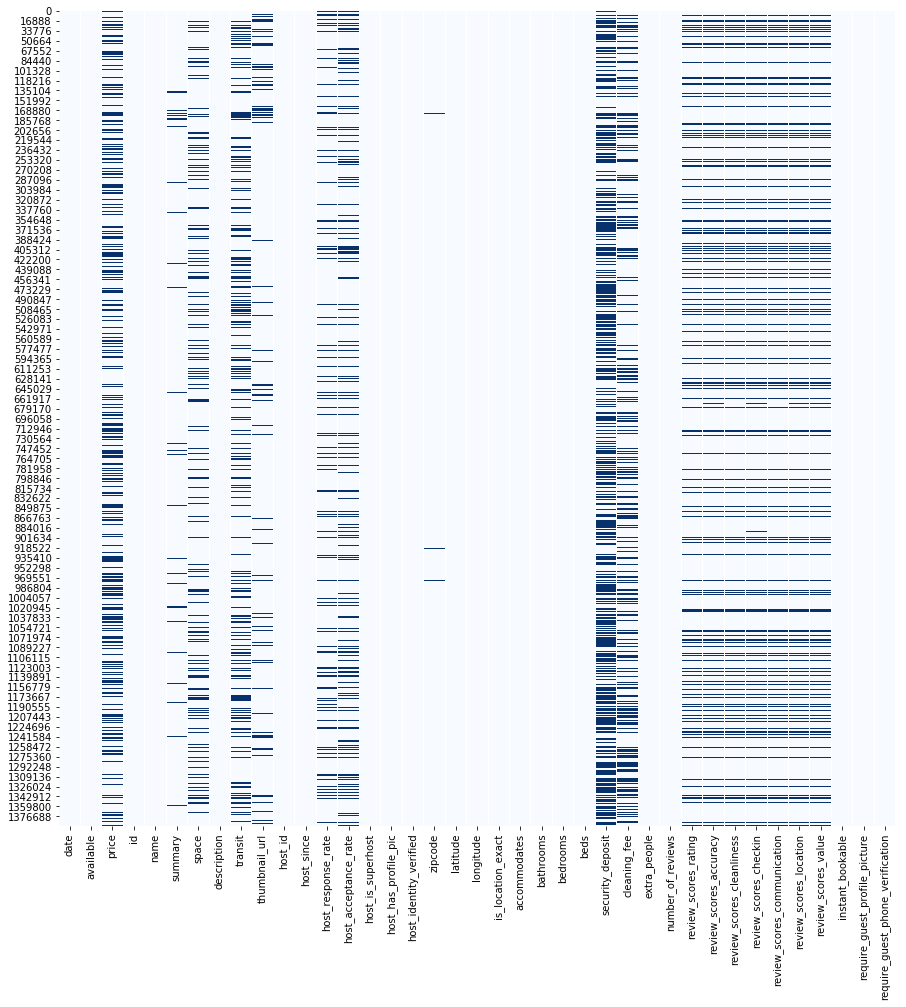

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cat_dummies.loc[:, :'require_guest_phone_verification'].isna(),\
            cmap='Blues', cbar=False); # Missing values are dark blue

Hmm, first of all, this plot shows that there are some columns that were intended to be dropped that have not yet been dropped. These are: 
- summary 
- space
- description
- transit
- host_response_rate
- host_acceptance_rate

These will need to be dropped. Removing these will remove the majority of columns with missing data. 

Beyond that, it is clear that when one rating is missing, it is very likely that other ratings are missing. There does not seem to be a clear relationship between the pattern of missing ratings and missing values in other areas. 

Other observations include the fact that most people do not require a security deposit. More than 50% also don't seem to require a cleaning fee, but more people require a cleaning fee than a security deposit. (This seems to make some sense as returning security deposits can be challenging to manage, but most visits do require cleaning)

It can also be seen that there are a few missing values in zipcode. Given the relatively small amount, I am going to drop these. 

The final decision to manage is what to do with the missing values for price and the ratings. 

Price is missing when the listing is not available. These could be filled with 0, but that would seem to create a distortion of the impact of price when predicting availability. It would also be possible to impute with the mean, but the mean across the board seems to generic. What seems reasonable is that while a listing may be unavailable, the effective price for that listing would be similar to that on days when it is available. Therefore, my plan is to impute the mean per listing id. 

My plan for ratings is to create a dummy for missing first, then impute the rest with the mean.

In [55]:
# Drop unnecessary columns
drop_cols = ['summary', 'space', 'description', 'transit', 
             'host_acceptance_rate', 'host_response_rate']
df_missing = df_cat_dummies.drop(drop_cols, axis=1)

# Test: Confirm dropped columns
assert df_missing.shape[1] == (df_cat_dummies.shape[1] - len(drop_cols))

In [56]:
# Drop rows with missing zip
df_missing.dropna(subset=['zipcode'], inplace=True)

# Test: Confirm dropped rows
assert df_missing.shape[0] == (df_cat_dummies.shape[0] \
                               - df_cat_dummies.zipcode.isna().sum())

In [61]:
# Fill na with 0 for security deposit and cleaning fee
df_missing.loc[:, ['security_deposit', 'cleaning_fee']] = \
df_missing[['security_deposit', 'cleaning_fee']].fillna(0)

# Test: Confirm no missing values in cols
assert df_missing[['security_deposit', 'cleaning_fee']].isna().sum().sum() == 0

In [52]:
# Get mean price per listing
mean_price = df_missing.groupby('id')['price'].mean().reset_index()
mean_price.head()

,id,price
0,10000273,182.080925
1,1000883,102.916667
2,10012724,25.000000
3,10015967,NaN
4,10019082,131.696629


That's interesting, although all listings have availabilities, at least one is listed as not having any price, which suggests that it has no availabilities. 

Let's check how many are missing prices.

In [53]:
mean_price.price.isna().sum()

95

In [54]:
mean_price.price.isna().sum() / mean_price.shape[0]

0.02508581991021917

There appear to be 95 listings (2.5% of total) that don't have any availability.  This is a little strange, as this was checked before with `has_availability`, but I think I'm going to drop these values. 

But first, need to fill the others.

In [69]:
# Fill missing price by id https://stackoverflow.com/questions/33457191/python-pandas-dataframe-fill-nans-with-a-conditional-mean
df_missing['price'].fillna(df_missing.groupby('id')['price'].transform("mean"),\
                           inplace=True)

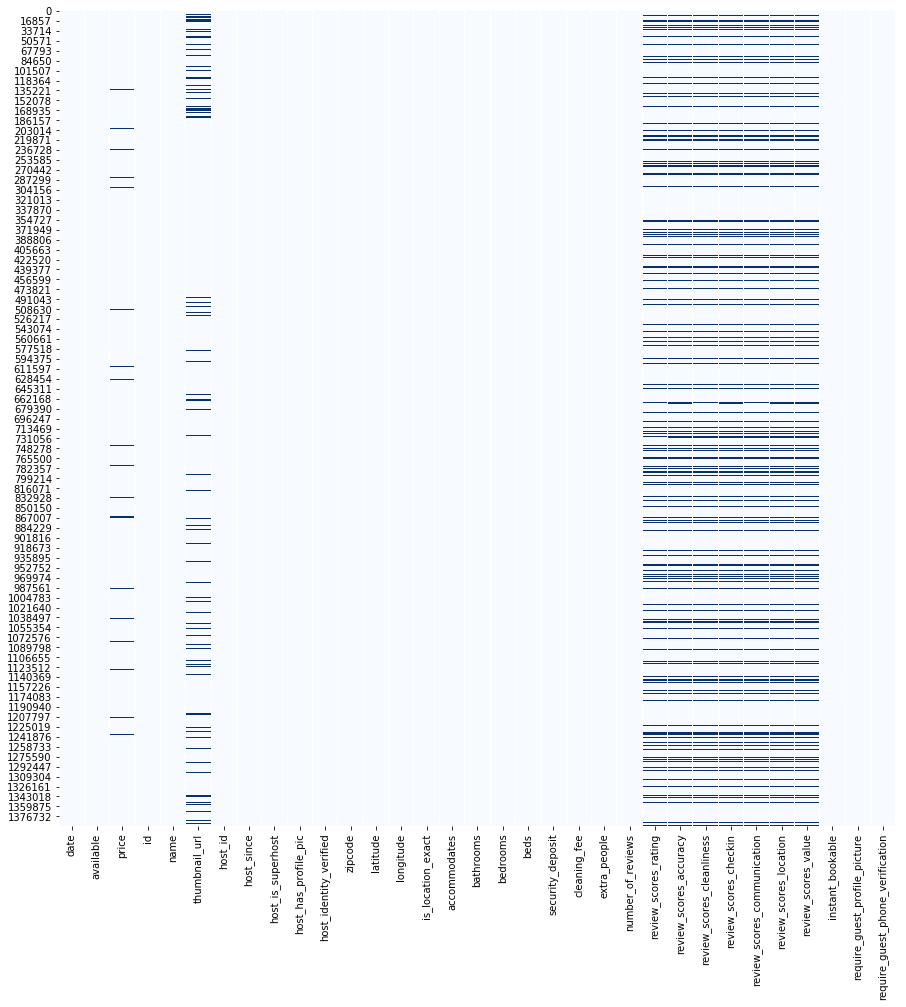

In [70]:
# Test: Unsure of count, so plotted to see if replacement happened
plt.figure(figsize=(15,15))
sns.heatmap(df_missing.loc[:, :'require_guest_phone_verification'].isna(),\
            cmap='Blues', cbar=False); # Missing values are dark blue

There is a dramatic reduction in the number of missing values for price, so this seems correct.

In [83]:
# Create dummy columns for missing ratings
rating_cols = ['review_scores_rating', 'review_scores_accuracy', 
               'review_scores_cleanliness', 'review_scores_checkin', 
               'review_scores_location', 'review_scores_value', 
               'review_scores_communication']

for col in rating_cols:
    df_missing[col + '_missing'] = df_missing[col].isna()

# Test: Confirm correct columns
assert df_missing.shape[1] \
       == (df_cat_dummies.shape[1] - len(drop_cols) + len(rating_cols))

In [84]:
# Fill missing ratings values
fill_mean = lambda col: col.fillna(col.mean())

df_missing.loc[:, rating_cols] = df_missing[rating_cols].apply(fill_mean, axis=0)

# Test: Confirm no missing values in ratings columns
assert df_missing[rating_cols].isna().sum().sum() == 0

In [79]:
# Create dummy column for missing picture
df_missing['listing_has_picture'] = ~(df_missing.thumbnail_url.isna())

# Test: Confirm that missing thumbnail_url is the same as 
# False listing_has_picture count
assert df_missing.thumbnail_url.isna().sum() \
       == df_missing[df_missing.listing_has_picture == False].shape[0]

In [86]:
# Drop remaining missing values
df_missing.drop('thumbnail_url', axis=1, inplace=True)
df_missing.dropna(subset=['price'], inplace=True)

# Test: Confirm no more missing values
assert df_missing.isna().sum().sum() == 0

All missing values have been managed. 